## Tokenization Practice and Simple Document Similarity

For this notebook, you have been provided the top 50 most downloaded books from Project Gutenberg over the last 90 days as text files.

In [23]:
import re
import glob
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import os
from nltk import sent_tokenize, word_tokenize, regexp_tokenize
from nltk.corpus import stopwords

from collections import Counter

Given a filepath, you can open the file and use the `read` method to extract the contents as a string.

For example, if we want to import the full text of War and Peace, we can do that using the following block of code.

In [26]:
filepath = '../books/War and Peace by graf Leo Tolstoy.txt'

with open(filepath, encoding = 'utf-8') as fi:
    book = fi.read()

You'll notice that there is some metadata at the top of the file and at the bottom of the file.

In [29]:
book[:1000]

'\ufeffThe Project Gutenberg eBook of War and Peace, by Leo Tolstoy\n\nThis eBook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this eBook or online at\nwww.gutenberg.org. If you are not located in the United States, you\nwill have to check the laws of the country where you are located before\nusing this eBook.\n\nTitle: War and Peace\n\nAuthor: Leo Tolstoy\n\nTranslators: Louise and Aylmer Maude\n\nRelease Date: April, 2001 [eBook #2600]\n[Most recently updated: January 21, 2019]\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\nProduced by: An Anonymous Volunteer and David Widger\n\n*** START OF THE PROJECT GUTENBERG EBOOK WAR AND PEACE ***\n\n\n\n\nWAR AND PEACE\n\n\nBy Leo Tolstoy/Tolstoi\n\n\n    Contents\n\n    BOOK ONE: 1805\n\n    CHAPTER I\n\n    CHAPTER II\n\n    CH

In [31]:
book[-18420:-18000]

'scious.\n\n\n\n\n*** END OF THE PROJECT GUTENBERG EBOOK WAR AND PEACE ***\n\nUpdated editions will replace the previous one--the old editions will\nbe renamed.\n\nCreating the works from print editions not protected by U.S. copyright\nlaw means that no one owns a United States copyright in these works,\nso the Foundation (and you!) can copy and distribute it in the\nUnited States without permission and without paying copyright\nro'

Write some code that will remove this text at the bottom and top of the string.

**Hint:** You might want to make use of the [`re.search`](https://docs.python.org/3/library/re.html#re.search) function from the `re` library.

In [34]:
start_marker = "*** START OF THE PROJECT GUTENBERG EBOOK WAR AND PEACE ***"
end_marker = "*** END OF THE PROJECT GUTENBERG EBOOK WAR AND PEACE ***"
start_idx = book.find(start_marker)
end_idx = book.find(end_marker)

if start_idx != -1 and end_idx != -1:
        book_clean = book[start_idx + len(start_marker):end_idx].strip()
else:
    book_clean = book  

#print(book_clean[:1000])


If we want to be able to scale up our analysis to multiple books, it would be nice to have a function to use repeatedly. Write a function called `import_book` which takes as an argument a filepath and returns the contents of that file as a string with the metadata at the top and bottom removed.

In [37]:
def import_book(filepath):
    with open(filepath, 'r', encoding ='utf-8') as file:
        text = file.read()

    start_mark = re.search(r"\*\*\*\s*START OF.*?\*\*\*", text, re.IGNORECASE | re.DOTALL)
    end_mark = re.search(r"\*\*\*\s*END OF.*?\*\*\*", text, re.IGNORECASE | re.DOTALL)
    if start_mark and end_mark:
        book_noMeta = text[start_mark.end():end_mark.start()].strip()
    else:
        book_noMeta = text
    print(book_noMeta[:1000])
folder_path = "../books"
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        filepath = os.path.join(folder_path, filename)
        import_book(filepath)
    

A CHRISTMAS CAROL

IN PROSE
BEING
A Ghost Story of Christmas

by Charles Dickens



PREFACE

I HAVE endeavoured in this Ghostly little book,
to raise the Ghost of an Idea, which shall not put my
readers out of humour with themselves, with each other,
with the season, or with me.  May it haunt their houses
pleasantly, and no one wish to lay it.

Their faithful Friend and Servant,
                                   C. D.
December, 1843.



CONTENTS

Stave   I: Marley's Ghost
Stave  II: The First of the Three Spirits
Stave III: The Second of the Three Spirits
Stave  IV: The Last of the Spirits
Stave   V: The End of It



STAVE I:  MARLEY'S GHOST

MARLEY was dead: to begin with. There is no doubt
whatever about that. The register of his burial was
signed by the clergyman, the clerk, the undertaker,
and the chief mourner. Scrooge signed it: and
Scrooge's name was good upon 'Change, for anything he
chose to put his hand to. Old Marley was as dead as a
door-nail.

Mind! I don't mean to say th

Now, let's utilize our function to import all of the books into a data structure of some kind.

First, we need to be able to iterate through the list of filepaths. For this, we can use the `glob` function. This function takes as agument a pattern to match. Try it out.

In [40]:
glob.glob('../books/*.txt')

['../books\\A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens.txt',
 '../books\\A Modest Proposal by Jonathan Swift.txt',
 '../books\\A Tale of Two Cities by Charles Dickens.txt',
 '../books\\Adventures of Huckleberry Finn by Mark Twain.txt',
 '../books\\Ang _Filibusterismo_.txt',
 '../books\\Anna Karenina by graf Leo Tolstoy.txt',
 '../books\\Anne of Green Gables by L. M.  Montgomery.txt',
 '../books\\Anthem by Ayn Rand.txt',
 '../books\\Crime and Punishment by Fyodor Dostoyevsky.txt',
 '../books\\Don Quixote by Miguel de Cervantes Saavedra.txt',
 '../books\\Dracula by Bram Stoker.txt',
 '../books\\Dubliners by James Joyce.txt',
 '../books\\Emma by Jane Austen.txt',
 '../books\\Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley.txt',
 '../books\\Great Expectations by Charles Dickens.txt',
 '../books\\Heart of Darkness by Joseph Conrad.txt',
 '../books\\Jane Eyre_ An Autobiography by Charlotte Brontë.txt',
 '../books\\Japanese Girls and

In [42]:
filepath = glob.glob('../books/*.txt')
filepath

['../books\\A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens.txt',
 '../books\\A Modest Proposal by Jonathan Swift.txt',
 '../books\\A Tale of Two Cities by Charles Dickens.txt',
 '../books\\Adventures of Huckleberry Finn by Mark Twain.txt',
 '../books\\Ang _Filibusterismo_.txt',
 '../books\\Anna Karenina by graf Leo Tolstoy.txt',
 '../books\\Anne of Green Gables by L. M.  Montgomery.txt',
 '../books\\Anthem by Ayn Rand.txt',
 '../books\\Crime and Punishment by Fyodor Dostoyevsky.txt',
 '../books\\Don Quixote by Miguel de Cervantes Saavedra.txt',
 '../books\\Dracula by Bram Stoker.txt',
 '../books\\Dubliners by James Joyce.txt',
 '../books\\Emma by Jane Austen.txt',
 '../books\\Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley.txt',
 '../books\\Great Expectations by Charles Dickens.txt',
 '../books\\Heart of Darkness by Joseph Conrad.txt',
 '../books\\Jane Eyre_ An Autobiography by Charlotte Brontë.txt',
 '../books\\Japanese Girls and

It would be nice to save the title of each book without the extra pieces around it. Write code that will remove the "books/" from the front of the filepath and the ".txt" from the end. That is, we want to extract just the "Little Women by Louisa May Alcott" from the current filepath.

In [110]:
book_titles = [path.removeprefix('../books\\').removesuffix('.txt') for path in filepath]
for title in book_titles:
    print(title)

A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens
A Modest Proposal by Jonathan Swift
A Tale of Two Cities by Charles Dickens
Adventures of Huckleberry Finn by Mark Twain
Ang _Filibusterismo_
Anna Karenina by graf Leo Tolstoy
Anne of Green Gables by L. M.  Montgomery
Anthem by Ayn Rand
Crime and Punishment by Fyodor Dostoyevsky
Don Quixote by Miguel de Cervantes Saavedra
Dracula by Bram Stoker
Dubliners by James Joyce
Emma by Jane Austen
Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley
Great Expectations by Charles Dickens
Heart of Darkness by Joseph Conrad
Jane Eyre_ An Autobiography by Charlotte Brontë
Japanese Girls and Women by Alice Mabel Bacon
Les Misérables by Victor Hugo
Leviathan by Thomas Hobbes
Little Women by Louisa May Alcott
Metamorphosis by Franz Kafka
Moby Dick; Or, The Whale by Herman Melville
Narrative of the Life of Frederick Douglass, an American Slave by Frederick Douglass
Oliver Twist by Charles Dickens
Peter Pan

Now, combine together the function you created and the code that you just wrote to iterate through the filepaths for the books and save the contents of each book into a dictionary whose keys are equal to the cleaned up titles.

books ={}
for path in filepath:
    title = path.removeprefix('../books\\').removesuffix('.txt')
    try:
        with open(path, 'r', encoding='utf-8') as file:
            dictionary = file.read()
            books[title] = dictionary
    except FileNotFoundError:
        print(f"File not found: {path}")
for title in books:
    print(title)

Now let's write some code so that we can cluster our books. In order to cluster, we'll need to be able to compute a similarity or distance between books.

A simple way to compute similarity of documents is the [Jaccard similarity](https://en.wikipedia.org/wiki/Jaccard_index) of the set of words that they conain. This metric computes the amount of overlap between two sets compared to their union. Two books which contain exactly the same words (but not necessarily in the same order or with the same frequency) will have a Jaccard similarity of 1 and two books which have no words in common will have a Jaccard similarity of 0.

**Question:** What might be some of the downsides to using Jaccard similarity to compute the similarity of two books?

In order to use this, we'll need to tokenize each book and store the results in a collection of some kind. Since we are interested in which words appear but not necessarily in what order or how frequently, we can make use of a [set](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset). A set is similar to a list, but the order of the contents does not matter and a set cannot contain duplicates.

For practice, let's grab one of our books.

In [115]:
#downsides of jaccard similarity:
#1.does not capture context
#2.will not recognize synonyms

In [117]:
book = books['Little Women by Louisa May Alcott']

Write some code which tokenizes Little Women and stores the tokens it contains in a set. It is up to you to decide exactly how you want to tokenize or what you want to count as a token.

Once you are happy with your tokenization method, convert it into a function named `tokenize_book` which takes in a string and returns a set of tokens.

In [119]:
def tokenize_book(text):
    text = text.lower()
    tokens = re.findall(r'\b[a-z]+\b', text)
    return set(tokens)
book = books['Little Women by Louisa May Alcott']
tokens = tokenize_book(book)
print(tokens)


{'praising', 'admission', 'wring', 'event', 'curb', 'settle', 'artless', 'unintelligible', 'shouted', 'concern', 'solitary', 'render', 'overnight', 'unlocks', 'plain', 'taking', 'helping', 'blindly', 'laurence', 'sit', 'involuntarily', 'currants', 'disagreement', 'peeping', 'convulse', 'tap', 'stupor', 'fly', 'wholesale', 're', 'sayings', 'foremast', 'viewing', 'patronize', 'finery', 'conscience', 'recitation', 'butterflies', 'exile', 'songs', 'fidelity', 'regards', 'rival', 'outtalked', 'embalm', 'testify', 'muffled', 'sincere', 'exact', 'sherwood', 'breath', 'laid', 'frankfurt', 'mort', 'destroy', 'push', 'gut', 'bouncer', 'unite', 'cared', 'interchanged', 'combs', 'do', 'tremble', 'rascal', 'sentimentlly', 'ensued', 'appeared', 'plum', 'friend', 'accomplished', 'peeks', 'shelves', 'inward', 'welcoming', 'cozy', 'childlike', 'powerless', 'fork', 'hose', 'posts', 'sympathy', 'vale', 'goodly', 'flutter', 'goethe', 'span', 'mount', 'shirt', 'sending', 'listener', 'ceasing', 'boathouse',

Now, write a function `jaccard` which takes in two sets of tokens and returns the Jaccard similarities between them. **Hint:** Python sets have `intersection` and `union` methods.

In [122]:
def tokenize_book(text):
    text = text.lower()
    tokens = re.findall(r'\b[a-z]+\b', text)
    return set(tokens)
set1 = books['Little Women by Louisa May Alcott']
set2 = books['A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens']
book1_tokens = tokenize_book(set1)
book2_tokens = tokenize_book(set2)
def jaccard(book1_tokens, book2_tokens):
    intersection = len(book1_tokens & book2_tokens)
    union = len(book1_tokens | book2_tokens)
    return intersection / union if union != 0 else 0
similarity = jaccard(book1_tokens, book2_tokens)
print(similarity)


0.28091364719415


Is Little Women more similar (using Jaccard Similarity) to Heart of Darkness or Anthem?

In [125]:
def tokenize_book(text):
    text = text.lower()
    tokens = re.findall(r'\b[a-z]+\b', text)
    return set(tokens)
set1 = books['Little Women by Louisa May Alcott']
set2 = books['Anthem by Ayn Rand']
book1_tokens = tokenize_book(set1)
book2_tokens = tokenize_book(set2)
def jaccard(book1_tokens, book2_tokens):
    intersection = len(book1_tokens & book2_tokens)
    union = len(book1_tokens | book2_tokens)
    return intersection / union if union != 0 else 0
similarity = jaccard(book1_tokens, book2_tokens)
print(similarity)

0.1775314506905956


In [130]:
def tokenize_book(text):
    text = text.lower()
    tokens = re.findall(r'\b[a-z]+\b', text)
    return set(tokens)
set1 = books['Little Women by Louisa May Alcott']
set2 = books['Heart of Darkness by Joseph Conrad']
book1_tokens = tokenize_book(set1)
book2_tokens = tokenize_book(set2)
def jaccard(book1_tokens, book2_tokens):
    intersection = len(book1_tokens & book2_tokens)
    union = len(book1_tokens | book2_tokens)
    return intersection / union if union != 0 else 0
similarity = jaccard(book1_tokens, book2_tokens)
print(similarity)
print(f'Little Women is more similar to Heart of Darkenss according to Jaccard Similarity value')

0.2926489912653629
Little Women is more similar to Heart of Darkenss according to Jaccard Similarity value


Let's create another dictionary called `book_tokens` that contains the title of each book as a key and the tokenized version of the book as values.

In [134]:
def tokenize_book(text):
    text = text.lower()
    tokens = re.findall(r'\b[a-z]+\b', text)
    return set(tokens)
book_tokens = {}
for title, content in books.items():
    tokens = tokenize_book(content)
    book_tokens[title] = tokens
    print(f'{title}: {len(tokens)} unique tokens')
    

A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens: 4627 unique tokens
A Modest Proposal by Jonathan Swift: 1574 unique tokens
A Tale of Two Cities by Charles Dickens: 9935 unique tokens
Adventures of Huckleberry Finn by Mark Twain: 6467 unique tokens
Ang _Filibusterismo_: 7091 unique tokens
Anna Karenina by graf Leo Tolstoy: 12748 unique tokens
Anne of Green Gables by L. M.  Montgomery: 7716 unique tokens
Anthem by Ayn Rand: 2422 unique tokens
Crime and Punishment by Fyodor Dostoyevsky: 9564 unique tokens
Don Quixote by Miguel de Cervantes Saavedra: 15590 unique tokens
Dracula by Bram Stoker: 9430 unique tokens
Dubliners by James Joyce: 7385 unique tokens
Emma by Jane Austen: 7324 unique tokens
Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley: 7238 unique tokens
Great Expectations by Charles Dickens: 10965 unique tokens
Heart of Darkness by Joseph Conrad: 5760 unique tokens
Jane Eyre_ An Autobiography by Charlotte Brontë: 12688 unique

Using this, let's create a distance matrix for our books using the jaccard function above. **Note:** You created a function for jaccard _similarity_. This can be converted to a **distance** by subtracting the similarity score from 1.

In [137]:
dists = np.zeros(shape = (len(book_tokens), len(book_tokens)))

Now, fill in the distance matrix so that in the i,j spot you have one minus the jaccard similarity of the ith and jth books.

In [139]:
def jaccard_similarity(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union != 0 else 0

titles = list(book_tokens.keys())
n = len(titles)
dists = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            sim = jaccard_similarity(book_tokens[titles[i]], book_tokens[titles[j]])
            dists[i][j] = 1 - sim  # Jaccard distance
        else:
            dists[i][j] = 0  # Distance to self is zero

distance_df = pd.DataFrame(dists, index=titles, columns=titles)
print(distance_df)


                                                    A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens  \
A Christmas Carol in Prose; Being a Ghost Story...                                           0.000000                                 
A Modest Proposal by Jonathan Swift                                                          0.782446                                 
A Tale of Two Cities by Charles Dickens                                                      0.688699                                 
Adventures of Huckleberry Finn by Mark Twain                                                 0.716715                                 
Ang _Filibusterismo_                                                                         0.936178                                 
Anna Karenina by graf Leo Tolstoy                                                            0.747025                                 
Anne of Green Gables by L. M.  Montgomery              

Once we have our distance matrix, we can compute a **dendogram**. 

A dendogram is a way to visualize a hierarchical clustering of a dataset. You can read more about it [here](https://www.statisticshowto.com/hierarchical-clustering/).

In [144]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\vetdd\\Documents\\NSS_project\\class_works\\nlp-01-tokenization-fvetdds\\notebooks\\images\\dendogram_complete_jaccard.png'

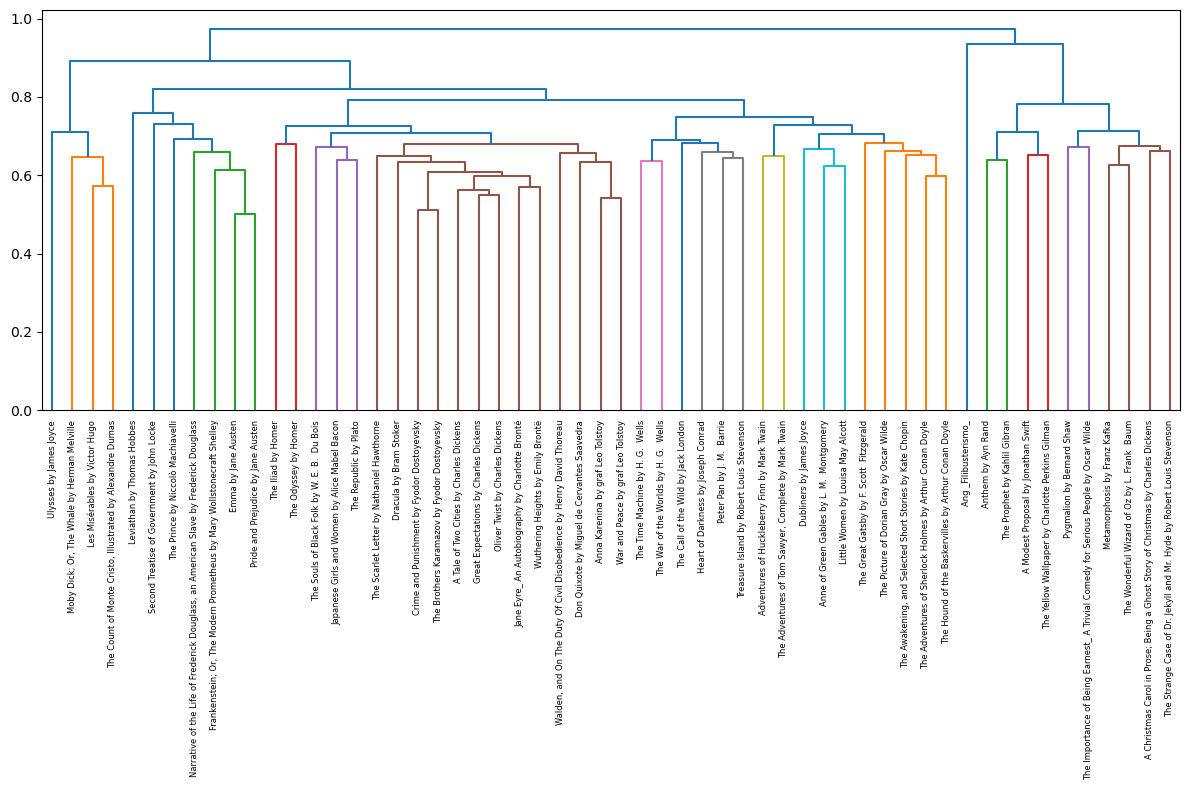

In [146]:
mergings = linkage(squareform(dists), method='complete')

plt.figure(figsize = (12,8))
dendrogram(mergings,
           labels = list(book_tokens.keys()),
           leaf_rotation = 90,
           leaf_font_size = 6);

plt.tight_layout()
plt.savefig('images/dendogram_complete_jaccard.png', transparent=False, facecolor='white', dpi = 150);

**Bonus Material** Jaccard Similarity does not account for the frequency that each word is used, only whether or not it is used.

We might be better off using the **cosine similarity** as a way to measure the similarity of two books.

Create a dataframe named `books_df` where each row corresponds to a book and each column corresponds to a word. It should count the number of times the word appears in that book (including zero). Use the book title as the index of this dataframe.